Purpose 

The purpose of this notebook is to compare the fraction active data generated in this study to the indel frequencies published by Kim et al. These plots are shown in Supplementary Figure 4a-c. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gpplot as gpp
import csv, requests, warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading supplementary table 6 of Kim et al, 2020
# Average indel frequencies at target sequences, grouped by four-nucleotide PAM sequences for xCas9, Cas9-NG and wtCas9
def read_parse_Kim():
    df_xcas9 = pd.read_excel('../data_files/Fig 1_3_PanPAM on-target/external/Kim2020/xCas9_Cas9-NG_wtCas9/41551_2019_505_MOESM8_ESM.xlsx',
                             sheet_name='xCas9 (Day 3)',
                             usecols=['four-nucleotide PAM','Number of protospacers','Average indel frequencies'])
    df_xcas9 = df_xcas9.dropna(axis=0)
    df_ng = pd.read_excel('../data_files/Fig 1_3_PanPAM on-target/external/Kim2020/xCas9_Cas9-NG_wtCas9/41551_2019_505_MOESM8_ESM.xlsx',
                          sheet_name='SpCas9-NG (Day 3)',
                          usecols=['four-nucleotide PAM','Number of protospacers','Average indel frequencies'])
    df_ng = df_ng.dropna(axis=0)    
    df_wt = pd.read_excel('../data_files/Fig 1_3_PanPAM on-target/external/Kim2020/xCas9_Cas9-NG_wtCas9/41551_2019_505_MOESM8_ESM.xlsx',
                          sheet_name='SpCas9 (Day 3)',
                          usecols=['four-nucleotide PAM','Number of protospacers','Average indel frequencies'])
    df_wt = df_wt.dropna(axis=0)
    return df_xcas9, df_ng, df_wt

def read_parse_gpp():
    df = pd.read_table('../data_files/Fig 1_3_PanPAM on-target/processed/fractionactive_allsgRNA_v2.txt',
                    usecols=['PAM',
                             'WTCas9 fraction active',
                             'xCas9-3.7 fraction active',
                             'Cas9-NG fraction active',
                             'N_PAM'])
    return df
    

In [3]:
kim_xcas9, kim_ng, kim_wt = read_parse_Kim()
kim_data = pd.merge(kim_xcas9, kim_ng, on='four-nucleotide PAM',suffixes=['_xCas9','_NG'])
kim_data = pd.merge(kim_data, kim_wt, on='four-nucleotide PAM')
kim_data = kim_data.rename(columns={'four-nucleotide PAM':'PAM','Number of protospacers':'Number of protospacers_WT','Average indel frequencies':'Average indel frequencies_WT'})

In [4]:
gpp_data = read_parse_gpp()

In [5]:
gpp_kim = pd.merge(gpp_data, kim_data, on='PAM')

In [6]:
#this loop creates "n_pam_hue", which will be used to color points in the following graphs
pam_type = []
for i in gpp_kim.N_PAM:
    pam = ''
    if i == 'NGGN':
        pam = i
    elif i == 'NGAN':
        pam = i
    elif i == 'NGCN':
        pam = i
    elif i == 'NGTN':
        pam = i
    else:
        pam = 'other'
    pam_type.append(pam)

In [7]:
color_dict = {'NGGN': '#a6d854',
             'NGAN': '#8da0cb',
             'NGCN': '#fc8d62',
             'NGTN': '#e78ac3',
             'other': '#66c2a5'}

In [8]:
gpp_kim['n_pam_hue'] = pam_type

In [9]:
gpp.set_aesthetics(context='paper', palette='Set2')

(0.0, 70.0)

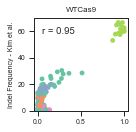

In [10]:
gpp.set_aesthetics(context='paper')
fig, ax = plt.subplots(figsize=(1.7,1.7))
g = sns.scatterplot(data=gpp_kim, x='WTCas9 fraction active',y='Average indel frequencies_WT', hue='n_pam_hue', palette=color_dict,
                   linewidth = 0, legend=False)
gpp.add_correlation(data=gpp_kim, x='WTCas9 fraction active',y='Average indel frequencies_WT')
t = plt.title('WTCas9', fontsize=8)
t = plt.xlabel('',fontsize=7)
t = plt.ylabel('Indel Frequency - Kim et al.',fontsize=7)
t = plt.tick_params(axis='both', labelsize=7)
plt.ylim(0,70)

(0.0, 1.0)

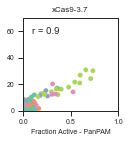

In [11]:
gpp.set_aesthetics(context='paper', palette='Set2')
fig, ax = plt.subplots(figsize=(1.7,1.7))
g = sns.scatterplot(data=gpp_kim, x='xCas9-3.7 fraction active',y='Average indel frequencies_xCas9', hue='n_pam_hue', palette=color_dict, 
                    linewidth = 0,
                   legend=False)
gpp.add_correlation(data=gpp_kim, x='xCas9-3.7 fraction active',y='Average indel frequencies_xCas9')
t = plt.title('xCas9-3.7', fontsize=8)
t = plt.xlabel('Fraction Active - PanPAM',fontsize=7)
t = plt.ylabel('',fontsize=7)
t = plt.tick_params(axis='both', labelsize=7)
t = plt.xticks([0, 0.5, 1])
plt.ylim(0,70)
plt.xlim(0,1)

(0.0, 70.0)

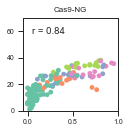

In [12]:
gpp.set_aesthetics(context='paper', palette='Set2')
fig, ax = plt.subplots(figsize=(1.7,1.7))
g = sns.scatterplot(data=gpp_kim, x='Cas9-NG fraction active',y='Average indel frequencies_NG', hue='n_pam_hue', palette=color_dict,
                    linewidth = 0, 
                   legend=False)
gpp.add_correlation(data=gpp_kim, x='Cas9-NG fraction active',y='Average indel frequencies_NG')
t = plt.title('Cas9-NG', fontsize=8)
t = plt.xlabel('',fontsize=7)
t = plt.ylabel('',fontsize=7)
t = plt.tick_params(axis='both', labelsize=7)
plt.ylim(0,70)

In [13]:
#number of points plotted in the graphs shown in Supplementary Fig 4a-c
print(len(gpp_kim))

148
